AI leads the way forward


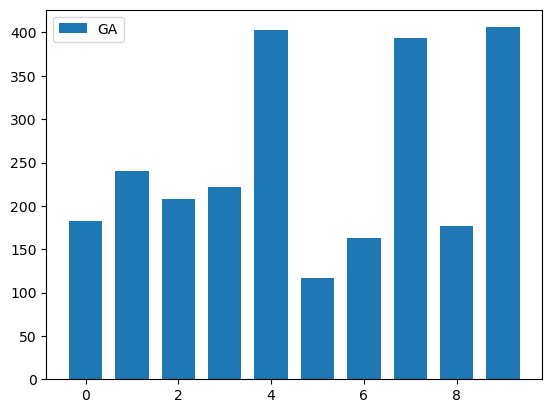

AI is changing the game


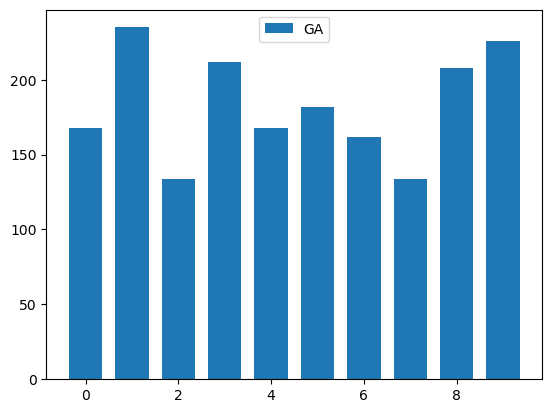

AI unlocks new potential


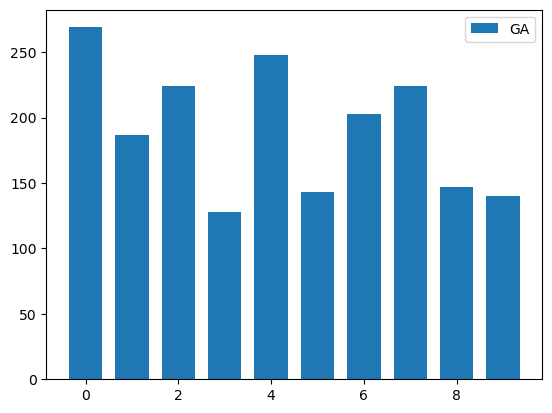

AI transforms industries


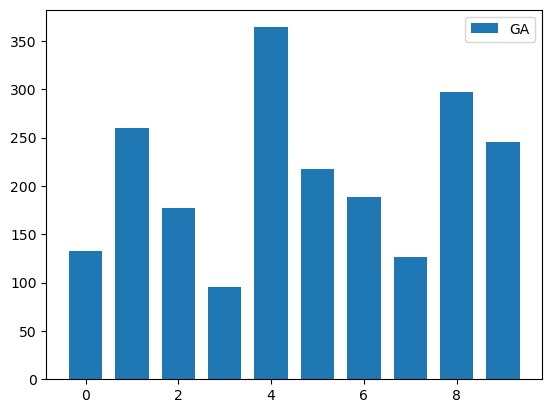

Ethics guide responsible AI


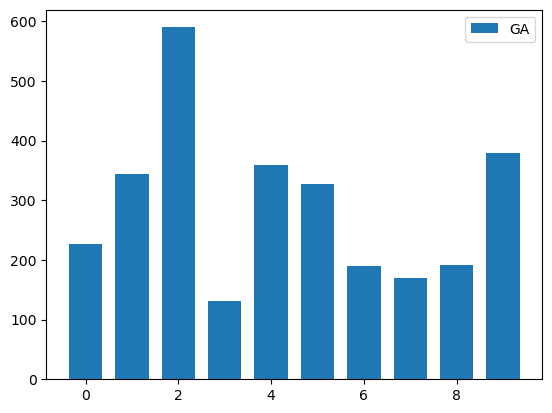

AI fuels technological progress


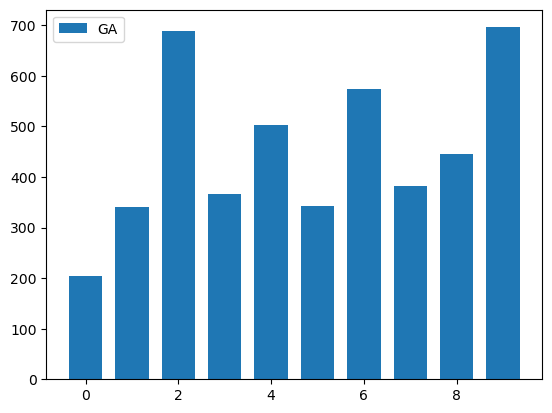

Data empowers AI systems


In [8]:
import random
import numpy
import matplotlib.pyplot as plt
import string
import threading

# Manter essas variáveis globais
alfabeto = " abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!.,"
in_str = None
in_str_len = None
populacao = 50
geracoes = 1000
elite_size = 6
mutacao_rate = 0.04
num_threads = 8
class Agent:
    def __init__(self, length):
        self.string = ''.join(random.choice(alfabeto) for _ in range(length))
        self.fitness = -1
    def __str__(self):
        return ('String: ' + str(self.string) + ' Fitness: ' + str(self.fitness))

def init_agents(populacao, length):
    return [Agent(length) for _ in range(populacao)]

## GA
def ga_Nicolas(agents):
    def get_fitness(string, target): #Função que calcula o fitness de um agente
        points = sum(1 for expected, actual in zip(target, string) if expected == actual)
        return ((points*10)/in_str_len)

    def fitness(agents):
        def evaluate_fitness(sub_agents): #Função que calcula o fitness de uma lista de agentes
            for agent in sub_agents:
                agent.fitness = get_fitness(agent.string, in_str)

        threads = [] #Lista de threads
        chunk_size = len(agents) // num_threads #Tamanho de cada chunk
        for i in range(num_threads): #Cria as threads
            start = i * chunk_size #Calcula o inicio do chunk
            end = start + chunk_size #Calcula o fim do chunk
            if i == num_threads - 1: #Se for a ultima thread
                end = len(agents) #O fim do chunk é o tamanho da lista
            thread = threading.Thread(target=evaluate_fitness, args=(agents[start:end],)) #Cria a thread
            threads.append(thread) #Adiciona a thread na lista de threads
            thread.start() #Inicia a thread

        for thread in threads: #Espera todas as threads terminarem
            thread.join() #Espera a thread terminar

        return agents

    def crossover(agents): #Função que realiza o crossover
        offspring = [] #Lista de filhos
        for _ in range(populacao - elite_size):
            pai1 = random.choice(agents)
            pai2 = random.choice(agents)
            if random.uniform(0.0, 1.0) <= 0.9: #Crossover de um ponto
                filho1 = Agent(in_str_len)
                filho2 = Agent(in_str_len)
                split = random.randint(0, in_str_len)
                filho1.string = pai1.string[0:split] + pai2.string[split:in_str_len]
                filho2.string = pai2.string[0:split] + pai1.string[split:in_str_len]
                offspring.append(filho1)
                offspring.append(filho2)
            else: #Crossover de dois pontos
                filho1 = Agent(in_str_len)
                filho2 = Agent(in_str_len)
                for i in range(in_str_len):
                    if random.uniform(0.0, 1.0) <= 0.6: #Se for menor que 0.6, o filho recebe o gene do pai1, senão do pai2
                        filho1.string = filho1.string + pai1.string[i]
                        filho2.string = filho2.string + pai2.string[i]
                    else: #Se for maior que 1, o filho recebe o gene do pai2, senão do pai1
                        filho1.string = filho1.string + pai2.string[i]
                        filho2.string = filho2.string + pai1.string[i]
                offspring.append(filho1)
                offspring.append(filho2)
        agents[elite_size:] = offspring #Substitui os agentes menos aptos pelos filhos
        return agents

    def mutacao(agents): #Função que realiza a mutação
        for agent in agents[elite_size:]:
            for idx, param in enumerate(agent.string): #Para cada gene do agente
                if random.uniform(0.0, 1.0) <= mutacao_rate: #Se for menor que a taxa de mutação, o gene é mutado
                    agent.string = agent.string[0:idx] + random.choice(alfabeto) + agent.string[idx+1:in_str_len] #O gene é substituido por um gene aleatório
        return agents

    import random

    def selecao(agents, elite_size):
        # Ordene os agentes por fitness em ordem decrescente
        agents.sort(key=lambda agent: agent.fitness, reverse=True)
        
        elite = agents[:elite_size]  # Seleciona os melhores agentes como elite
        remaining = agents[elite_size:]
        
        # Use seleção por torneio para preencher o restante da população
        new_population = elite[:]
        tournament_size = 3  # Tamanho do torneio
        
        while len(new_population) < len(agents):
            tournament = random.sample(remaining, tournament_size)
            best_agent = max(tournament, key=lambda agent: agent.fitness)
            new_population.append(best_agent)
        
        return new_population


    for geracao in range(geracoes): #Para cada geração
        agents = fitness(agents) #Calcula o fitness de cada agente
        agents = sorted(agents, key=lambda agent: agent.fitness, reverse=True) #Ordena os agentes por fitness
        if any(agent.fitness >= 10.0 for agent in agents): #Se algum agente tiver fitness 10, retorna a geração
            return geracao
        agents = selecao(agents, elite_size) #Seleciona os agentes
        agents = crossover(agents) #Realiza o crossover
        agents = mutacao(agents) #Realiza a mutação
    return geracoes


## Plotagem
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True): #Função que plota o gráfico
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color'] #Cores padrão
    n_bars = len(data)
    bar_width = total_width / n_bars #Largura de cada barra
    bars = []
    for i, (name, values) in enumerate(data.items()): #Para cada barra
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2
        for x, y in enumerate(values): #Para cada valor da barra
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)]) #Plota a barra
        bars.append(bar[0])
    if legend:
        ax.legend(bars, data.keys()) #Adiciona a legenda
 

## Principal

if __name__ == '__main__': #Função avaliacao 

    frases = {
      "AI is changing the game",
      "Smart machines shape AI",
      "AI leads the way forward",
      "Data empowers AI systems",
      "Machine learning drives AI",
      "AI unlocks new potential",
      "AI transforms industries",
      "Ethics guide responsible AI",
      "AI fuels technological progress",
      "AI revolutionizes our world",
    }

    final = {
        "GA" : numpy.zeros(10), 
    } 

    index = 0
    for frase in frases: 
      in_str = frase
      in_str_len = len(in_str)
      agents = init_agents(populacao, in_str_len)  
      results = {
        "GA" : numpy.zeros(10), 
      }
      print(frase) 
      for i in range(10):
        results["GA"][i] = ga_Nicolas(agents) 

      fig, ax = plt.subplots()
      bar_plot(ax, results, total_width=.8, single_width=.9)
      plt.show()

      final["GA"][index] = numpy.mean(results["GA"]) 
      index = index + 1

    print(" #### Final ####") 
    fig, ax = plt.subplots() 
    bar_plot(ax, final, total_width=.8, single_width=.9)
    plt.show()   

    print("GA -> ", numpy.mean(final["GA"])) #Média de gerações para cada frase
    

    


## algoritmo genetico IA2 TESTES
# GA = 340 tx_mutacao 0.09 tempo 46.4s crossover 0.6 elite 7
# GA = 294 tx_mutacao 0.06 tempo 39.1s crossover 0.6 elite 7
# GA = 289 tx_mutacao 0.07 tempo 37.8s crossover 0.6 elite 7
# GA = 263 tx_mutacao 0.05 tempo 34.1s crossover 0.6 elite 7
# GA = 260 tx_mutacao 0.04 tempo 34.3s crossover 0.6 elite 7
# GA = 194 tx_mutacao 0.04 tempo 22.1s crossover 0.8 elite 7
# GA = 147 tx_mutacao 0.04 tempo 14.5s crossover 1.0 elite 7
# GA = 568 tx_mutacao 0.01 tempo 1m 10s crossover 0.6 elite 7
